In [50]:
import numpy as np
import matplotlib.pyplot as plt

def formula_fox(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas):
    nova_carga = ((69/0.10197)*pessoas) + carga
    massa_especifica_arquente = massa_especifica_ar - ((6*nova_carga)/(gravidade*np.pi*(diametro**3)))
    temp_arquente = ((t_ambiente*massa_especifica_ar)/massa_especifica_arquente)
    return diametro, temp_arquente

def custo_total(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas):
    _, temp_arquente = formula_fox(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas)
    return 50 * (temp_arquente-273) + 200 * diametro

massa_especifica_ar = 1.227  
t_ambiente = 273 + 15  
carga = 2670    
diametro = 15           
gravidade = 9.81         
pessoas = 0

massa_especifica_arquente, temp_arquente = formula_fox(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas);

print("Temperatura do ar quente:", temp_arquente -273, "°C")

Temperatura do ar quente: 56.3399238745713 °C


+ Gráfico Aumentando Quantidade de Pessoas

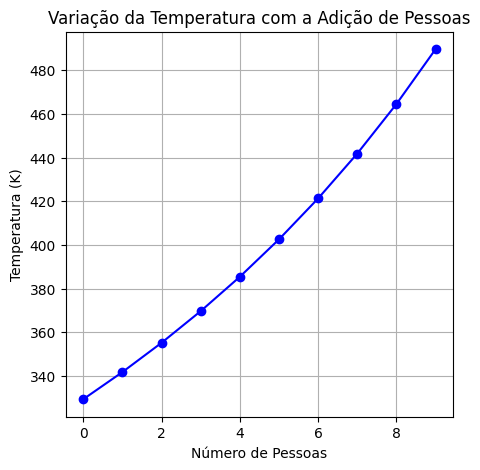

In [51]:
temperatures = []

for i in range(10):
    massa_especifica_arquente, temp_arquente = formula_fox(diametro, carga, t_ambiente, gravidade, massa_especifica_ar, i);
    temperatures.append(temp_arquente)
    #print(temp_air, " - ",i)

plt.figure(figsize=(5, 5))
plt.plot(range(10), temperatures, marker='o', color='blue')
plt.xlabel('Número de Pessoas')
plt.ylabel('Temperatura (K)')
plt.title('Variação da Temperatura com a Adição de Pessoas')
plt.grid(True)
plt.show()

+ Gráfico Variando o Tamanho do Balão 

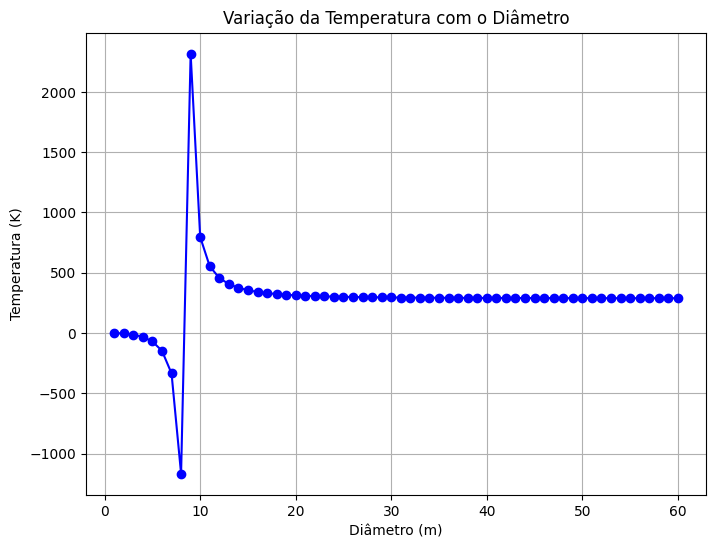

In [52]:
diametros = range(1, 61, 1)
temperatures = []

for d in diametros:    
    massa_especifica_arquente, temp_arquente = formula_fox(d, carga, t_ambiente, gravidade, massa_especifica_ar, 2);
    temperatures.append(temp_arquente)
    #print(d," - ", temp_arquente,"k - ",massa_especifica_arquente)

plt.figure(figsize=(8, 6))
plt.plot(diametros, temperatures, marker='o', color='blue')
plt.title('Variação da Temperatura com o Diâmetro')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Temperatura (K)')
plt.grid(True)
plt.show()


+ Otimização do diametro

In [58]:
p = [1,3,5]

for qtd_pessoas in p:
    resultado_minimizacao = minimize_scalar(lambda d: custo_total(d, carga, t_ambiente, gravidade, massa_especifica_ar, qtd_pessoas), bounds=(0, 100), method='bounded')
    diametro_min = resultado_minimizacao.x

    print(qtd_pessoas," pessoas extras no cesto:")
    print("Diâmetro do balão que minimiza o Custo Total:", round(diametro_min, 4), "metros")
    print("Custo Total minimo: ", round(resultado_minimizacao.fun, 4),"\n")

1  pessoas extras no cesto:
Diâmetro do balão que minimiza o Custo Total: 19.1419 metros
Custo Total minimo:  5757.8832 

3  pessoas extras no cesto:
Diâmetro do balão que minimiza o Custo Total: 20.905 metros
Custo Total minimo:  6210.9103 

5  pessoas extras no cesto:
Diâmetro do balão que minimiza o Custo Total: 22.3271 metros
Custo Total minimo:  6575.433 



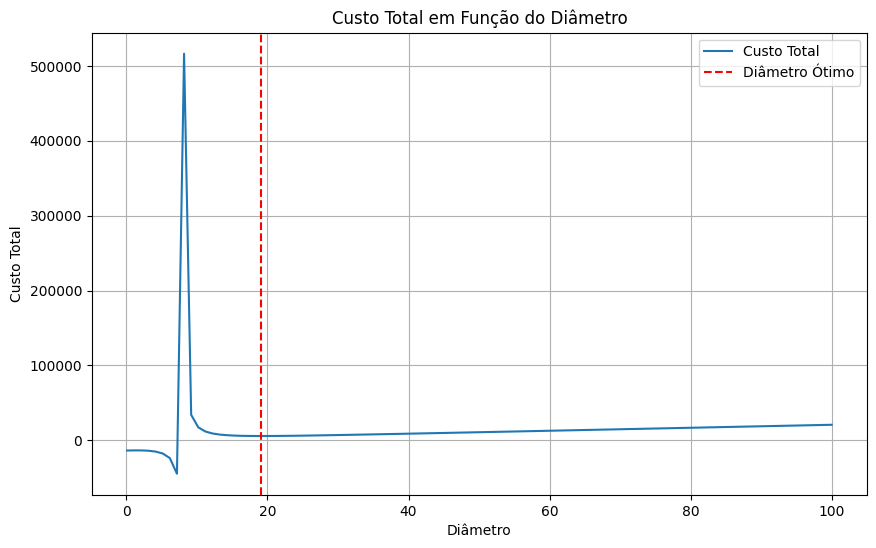

In [54]:
pessoas = 1

# Minimização para encontrar o diâmetro ótimo
resultado_minimizacao = minimize_scalar(lambda d: custo_total(d, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas), bounds=(0, 100), method='bounded')
diametro_min = resultado_minimizacao.x

# Intervalo de diâmetros para o gráfico
diametros = np.linspace(0.1, 100, 100)
custos = [custo_total(d, carga, t_ambiente, gravidade, massa_especifica_ar, pessoas) for d in diametros]

plt.figure(figsize=(10, 6))
plt.plot(diametros, custos, label='Custo Total')
plt.axvline(x=diametro_min, color='r', linestyle='--', label='Diâmetro Ótimo')
plt.xlabel('Diâmetro')
plt.ylabel('Custo Total')
plt.title('Custo Total em Função do Diâmetro')
plt.legend()
plt.grid(True)
plt.show()
